In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load Dataset

In [2]:
data = pd.read_csv("IO 2010 Sulawesi Selatan.csv")
data.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
0,Padi,1,860269.596200,0.000000,0.000000,10359.337980,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,0.000000,0.000000e+00,0.000000e+00,1.124889e+07,0.0,0.0,1.124889e+07,1.124889e+07
1,Tanaman bahan makanan lainnya,2,0.000000,582084.149900,0.000000,182189.380600,0.000000,2456.429353,0.0,0.000000,...,0.0,0.0000,27830.707960,8.878554e+05,5.390295e+06,7.288266e+06,0.0,0.0,7.288266e+06,7.288266e+06
2,Tanaman perkebunan,3,0.901156,3531.156853,644018.173500,49761.165470,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,3412.477837,4.821600e+06,5.352460e+06,9.183128e+06,0.0,0.0,9.183128e+06,9.183128e+06
3,Peternakan dan hasil-hasilnya,4,100432.730100,204951.991000,40607.181690,85817.333650,0.000000,330.516666,0.0,0.000000,...,0.0,135804.8442,8884.349717,1.654981e+05,1.129234e+06,2.166391e+06,0.0,0.0,2.166391e+06,2.166391e+06
4,Kehutanan,5,55.120636,372.029473,971.848231,48.555593,137.652127,1281.859853,0.0,33.713091,...,0.0,0.0000,905.531144,3.540820e+04,7.836585e+04,1.529393e+05,0.0,0.0,1.529393e+05,1.529393e+05


In [3]:
data.tail()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
39,Penyusutan,203,1.452299e+05,2.587877e+04,1.147662e+05,2.883109e+04,5119.723838,2.872259e+05,10511.751150,8.300689e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Pajak Tak Langsung,204,6.937260e+04,5.641550e+04,3.815486e+04,1.665497e+04,1064.637014,6.872361e+04,2272.474521,3.013393e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Subsidi,205,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Nilai Tambah Bruto,209,8.658558e+06,6.108251e+06,6.305311e+06,1.541825e+06,122502.675300,7.705983e+06,218219.567500,6.901461e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Jumlah Input,210,1.124889e+07,7.288266e+06,9.183128e+06,2.166391e+06,152939.335200,8.630996e+06,341949.506400,1.032085e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.rename( columns={'Unnamed: 0':'Sektor', 'Unnamed: 1':'Kode'}, inplace=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 49 columns):
Sektor    44 non-null object
Kode      44 non-null int64
1         44 non-null float64
2         44 non-null float64
3         44 non-null float64
4         44 non-null float64
5         44 non-null float64
6         44 non-null float64
7         44 non-null float64
8         44 non-null float64
9         44 non-null int64
10        44 non-null float64
11        44 non-null float64
12        44 non-null float64
13        44 non-null float64
14        44 non-null float64
15        44 non-null float64
16        44 non-null float64
17        44 non-null float64
18        44 non-null float64
19        44 non-null float64
20        44 non-null float64
21        44 non-null float64
22        44 non-null float64
23        44 non-null float64
24        44 non-null float64
25        44 non-null float64
26        44 non-null float64
27        44 non-null float64
28        44 non-null float64
29

## Matrix A

In [5]:
a = data.iloc[:35, :37]
del a["Sektor"] , a["Kode"]
a.tail()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
30,3743.743622,12615.745520,19866.223940,4997.007998,520.528403,12308.320550,3034.314396,402704.377700,0,5178.198506,...,105917.39100,138251.392700,34613.14768,2326.477078,2810.614248,334696.754300,72981.91809,4.066154e+04,4.254848e+05,2893.575190
31,1185.584115,5772.949342,4722.638898,1515.836749,215.115812,5152.120281,263.303981,12983.477990,0,1704.741704,...,50763.07169,242383.421600,16207.09331,70074.130360,44552.119400,87720.902270,273359.20490,4.605670e+04,1.214648e+06,3722.121816
32,173531.401300,65510.072460,231213.093300,9226.947703,7973.510287,96451.519420,86609.491590,79132.710210,0,315.907155,...,350474.01410,791182.442200,9624.00534,186209.002000,17643.794460,77181.600910,70381.48052,1.025157e+06,2.720107e+05,39668.729670
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.560871e-01,0.000000e+00,0.000000
34,2015.786614,1896.493266,7867.852625,847.263499,730.432787,650.642870,562.535946,2966.602608,0,33.977372,...,13833.95433,9494.223231,851.43087,125043.301700,434.577375,3013.151661,15069.10638,1.965451e+04,2.954665e+04,12663.464620


In [6]:
jumlah = data.iloc[-1:, :37]
jumlah = jumlah.reset_index()
del jumlah["Sektor"] , jumlah["Kode"] , jumlah["index"]
jumlah.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,11248891.52,7288265.63,9183127.86,2166391.208,152939.3352,8630995.631,341949.5064,10320846.52,0,663934.8121,...,20981684.9,20833083.38,4930711.36,6189809.316,1853847.917,4145553.939,3035967.829,9565159.283,32627340.14,1032523.337


In [7]:
aa = np.array(a)
bb = np.array(jumlah)
aa , bb

(array([[8.60269596e+05, 0.00000000e+00, 0.00000000e+00, ...,
         3.99480628e+02, 1.87270591e+02, 9.11954677e+00],
        [0.00000000e+00, 5.82084150e+05, 0.00000000e+00, ...,
         2.70570670e+03, 1.04214573e+05, 1.49737588e+04],
        [9.01156375e-01, 3.53115685e+03, 6.44018174e+05, ...,
         2.47815250e+01, 6.73316928e+03, 2.76412648e+03],
        ...,
        [1.73531401e+05, 6.55100725e+04, 2.31213093e+05, ...,
         1.02515650e+06, 2.72010730e+05, 3.96687297e+04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56087110e-01, 0.00000000e+00, 0.00000000e+00],
        [2.01578661e+03, 1.89649327e+03, 7.86785263e+03, ...,
         1.96545126e+04, 2.95466451e+04, 1.26634646e+04]]),
 array([[1.12488915e+07, 7.28826563e+06, 9.18312786e+06, 2.16639121e+06,
         1.52939335e+05, 8.63099563e+06, 3.41949506e+05, 1.03208465e+07,
         0.00000000e+00, 6.63934812e+05, 4.19455999e+06, 2.61105087e+07,
         2.97457171e+05, 1.11495822e+05, 2.750

In [8]:
matrix_a = np.divide(aa,bb, out=np.zeros_like(aa), where=bb!=0)
matrix_a

array([[7.64759438e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.17641375e-05, 5.73968305e-06, 8.83229119e-06],
       [0.00000000e+00, 7.98659351e-02, 0.00000000e+00, ...,
        2.82871056e-04, 3.19408731e-03, 1.45021020e-02],
       [8.01106823e-08, 4.84498924e-04, 7.01305899e-02, ...,
        2.59081153e-06, 2.06365865e-04, 2.67705957e-03],
       ...,
       [1.54265334e-02, 8.98843096e-03, 2.51780327e-02, ...,
        1.07176104e-01, 8.33689564e-03, 3.84192088e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.63182970e-08, 0.00000000e+00, 0.00000000e+00],
       [1.79198689e-04, 2.60211875e-04, 8.56772632e-04, ...,
        2.05480243e-03, 9.05579340e-04, 1.22645796e-02]])

In [9]:
# Make identity matrix
identitas = np.identity(35, dtype = None)
identitas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
i_a = np.subtract(identitas,matrix_a)
i_a

array([[ 9.23524056e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.17641375e-05, -5.73968305e-06, -8.83229119e-06],
       [ 0.00000000e+00,  9.20134065e-01,  0.00000000e+00, ...,
        -2.82871056e-04, -3.19408731e-03, -1.45021020e-02],
       [-8.01106823e-08, -4.84498924e-04,  9.29869410e-01, ...,
        -2.59081153e-06, -2.06365865e-04, -2.67705957e-03],
       ...,
       [-1.54265334e-02, -8.98843096e-03, -2.51780327e-02, ...,
         8.92823896e-01, -8.33689564e-03, -3.84192088e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.63182970e-08,  1.00000000e+00,  0.00000000e+00],
       [-1.79198689e-04, -2.60211875e-04, -8.56772632e-04, ...,
        -2.05480243e-03, -9.05579340e-04,  9.87735420e-01]])

## Matrix Pengganda

In [11]:
BL = np.linalg.inv(i_a)
BL

array([[1.08306502e+00, 1.08156128e-03, 9.85669645e-04, ...,
        1.27808660e-03, 7.34399193e-03, 2.26223008e-02],
       [9.63991943e-04, 1.08992357e+00, 6.92688144e-04, ...,
        8.83637423e-04, 5.22606966e-03, 1.91518173e-02],
       [3.50311515e-04, 1.76103563e-03, 1.07592503e+00, ...,
        5.10323278e-04, 2.77404332e-03, 1.06846744e-02],
       ...,
       [1.93033939e-02, 1.30455340e-02, 3.20991730e-02, ...,
        1.12377997e+00, 1.51431530e-02, 5.02245799e-02],
       [3.14998515e-10, 2.12880899e-10, 5.23803838e-10, ...,
        1.83381753e-08, 1.00000000e+00, 8.19579612e-10],
       [3.08534085e-04, 5.15573268e-04, 1.29236451e-03, ...,
        2.64265738e-03, 1.78096443e-03, 1.01296065e+00]])

# Input Antara Impor

In [12]:
iai = data.loc[data["Sektor"] == "Input Antara Impor"]
iai = iai.reset_index()
del iai["Sektor"] , iai["Kode"], iai["index"]
iai = iai.iloc[:, :35]
n = iai / jumlah
n

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.120153,0.006058,0.177333,0.050676,0.073816,0.009747,0.071272,0.228103,NaN,0.02951,...,0.143173,0.004468,0.046089,0.129547,0.164186,0.004333,0.098266,0.00175,0.232102,0.008835


In [13]:
n = np.array(n)
d = np.diag(n[0])
d

array([[0.12015286, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00605817, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.17733325, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00175045, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.23210236,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00883547]])

### IAI x Pengganda

In [14]:
impor = np.multiply(d, BL, out=np.zeros_like(aa), where=bb!=0)
hasil1 = np.sum(impor, axis=0)
hasil1

array([0.13013336, 0.00660295, 0.19079729, 0.05296775, 0.0738853 ,
       0.01011087, 0.07229462, 0.22845323, 0.        , 0.03011778,
       0.00177336, 0.00893851, 0.30237157, 0.39533258, 0.33358597,
       0.61979458, 0.56200466, 0.5761416 , 0.06967964, 0.7118355 ,
       0.59341723, 0.15339374, 0.3202549 , 0.89493078, 0.5433602 ,
       0.14393019, 0.00448738, 0.04626648, 0.13551515, 0.16502839,
       0.00472205, 0.10821009, 0.00196712, 0.23210236, 0.00894998])

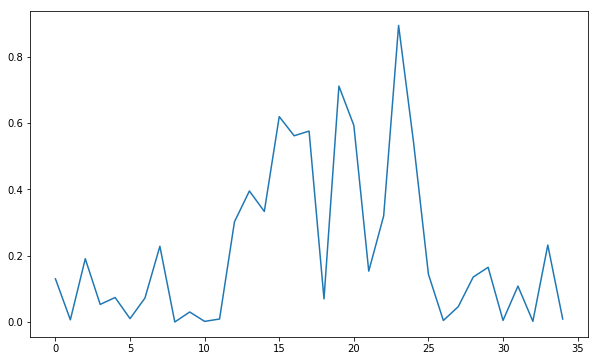

In [15]:
plt.figure(figsize=(10,6))
plt.plot(hasil1)

# Upah dan Gaji

In [16]:
udg = data.loc[data["Sektor"] == "Upah dan Gaji"]
udg = udg.reset_index()
del udg["Sektor"] , udg["Kode"], udg["index"]
udg = udg.iloc[:, :35]
n = udg / jumlah
n

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.130112,0.115207,0.162026,0.137591,0.172319,0.173666,0.033696,0.192384,NaN,0.020379,...,0.160755,0.20239,0.114394,0.12477,0.145189,0.145327,0.158271,0.166063,0.575309,0.356554


In [17]:
n = np.array(n)
f = np.diag(n[0])
f

array([[0.13011221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11520662, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16202647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1660634 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.57530891,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.35655353]])

### UdG x Pengganda

In [18]:
gaji = np.multiply(f, BL, out=np.zeros_like(aa), where=bb!=0)
hasil2 = np.sum(gaji, axis=0)
hasil2

array([0.14091998, 0.12556641, 0.17432833, 0.14381469, 0.17248102,
       0.18014833, 0.03417905, 0.19267983, 0.        , 0.0207984 ,
       0.11762447, 0.03833075, 0.08246894, 0.16545418, 0.16696356,
       0.05291045, 0.05676269, 0.08332444, 0.16457215, 0.04002769,
       0.0537703 , 0.2691864 , 0.05379638, 0.02558422, 0.14665223,
       0.16160472, 0.20326943, 0.11483429, 0.13051794, 0.14593368,
       0.15839226, 0.17428665, 0.18661872, 0.57530891, 0.3611747 ])

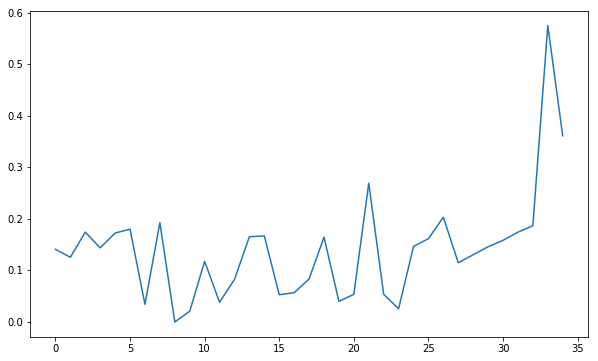

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hasil2)

# Nilai Tambah Bruto

In [20]:
ntb = data.loc[data["Sektor"] == "Nilai Tambah Bruto"]
ntb = ntb.reset_index()
del ntb["Sektor"] , ntb["Kode"], ntb["index"]
ntb = ntb.iloc[:, :35]
x = ntb / jumlah
x

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.769725,0.838094,0.686619,0.711702,0.800989,0.892827,0.638163,0.668691,NaN,0.070942,...,0.311439,0.896759,0.355465,0.635945,0.495826,0.630361,0.65113,0.816517,0.604508,0.780848


In [21]:
n = np.array(x)
c = np.diag(n[0])
c

array([[0.76972544, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83809397, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.68661909, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8165169 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.60450774,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.78084777]])

### UdG x Pengganda

In [22]:
ntambah = np.multiply(c, BL, out=np.zeros_like(aa), where=bb!=0)
hasil7 = np.sum(ntambah, axis=0)
hasil7

array([0.8336627 , 0.91345837, 0.73875067, 0.74389392, 0.80174239,
       0.92615147, 0.64731534, 0.66971839, 0.        , 0.07240335,
       0.44134338, 0.19667083, 0.34531285, 0.49455103, 0.50725394,
       0.18134469, 0.18389262, 0.22034616, 0.72174896, 0.11819864,
       0.11733691, 0.72164688, 0.61412752, 0.0746571 , 0.31451589,
       0.31308498, 0.90065672, 0.35683311, 0.66524262, 0.49836866,
       0.68703183, 0.71702055, 0.91758534, 0.60450774, 0.79096806])

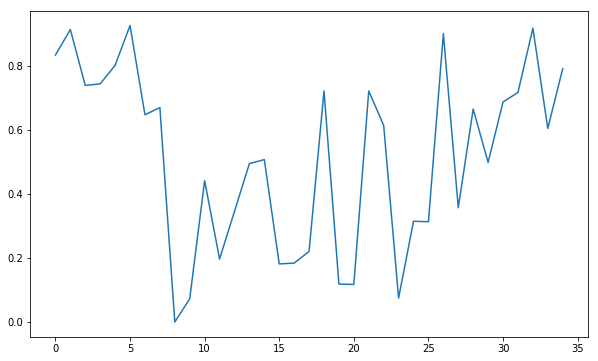

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hasil7)

# Surplus Usaha

In [24]:
su = data.loc[data["Sektor"] == "Surplus Usaha"]
su = su.reset_index()
del su["Sektor"] , su["Kode"], su["index"]
su = su.iloc[:, :35]
y = su / jumlah
y

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.620536,0.711596,0.50794,0.553115,0.588233,0.67792,0.567081,0.366683,NaN,0.047253,...,0.11182,0.582445,0.189176,0.410532,0.230639,0.12572,0.34083,0.581678,0.0,0.310278


In [25]:
n = np.array(y)
g = np.diag(n[0])
g

array([[0.62053558, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71159601, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50794023, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.58167796, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31027763]])

### SU x Pengganda

In [26]:
opit = np.multiply(g, BL, out=np.zeros_like(aa), where=bb!=0)
hasil3 = np.sum(opit, axis=0)
hasil3

array([ 0.67208038,  0.77558527,  0.54650561,  0.57813328,  0.58878663,
        0.70322299,  0.57521382,  0.36724661,  0.        ,  0.04822638,
        0.31294131,  0.14835169,  0.24550358,  0.27653348,  0.29078973,
        0.09558119,  0.10070536,  0.10512275,  0.34480187,  0.05530481,
        0.04116467,  0.29456961,  0.45045871,  0.03692343, -0.04711819,
        0.11241056,  0.58497676,  0.18990418,  0.42944503,  0.23182164,
        0.13702249,  0.37532023,  0.65367804,  0.        ,  0.31429903])

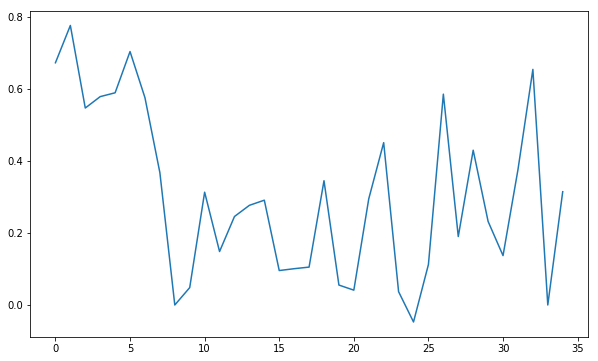

In [27]:
plt.figure(figsize=(10,6))
plt.plot(hasil3)

# Penyusutan

In [28]:
iai = data.loc[data["Sektor"] == "Penyusutan"]
iai = iai.reset_index()
del iai["Sektor"] , iai["Kode"], iai["index"]
iai = iai.iloc[:, :35]
n = iai / jumlah
n

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.012911,0.003551,0.012498,0.013308,0.033476,0.033278,0.030741,0.080426,NaN,0.002631,...,0.024846,0.052302,0.022565,0.091577,0.099443,0.352729,0.144202,0.043891,0.029199,0.094922


In [29]:
n = np.array(n)
d = np.diag(n[0])
d

array([[0.0129106 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00355074, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01249751, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04389122, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02919883,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09492163]])

### Penyusutan x Pengganda

In [30]:
susut = np.multiply(d, BL, out=np.zeros_like(aa), where=bb!=0)
hasil4 = np.sum(susut, axis=0)
hasil4

array([0.01398301, 0.00387004, 0.01344638, 0.01391032, 0.03350702,
       0.03452054, 0.03118152, 0.08054996, 0.        , 0.00268517,
       0.00929415, 0.00679266, 0.01049962, 0.02942815, 0.04021197,
       0.02160693, 0.01629786, 0.01617688, 0.12538289, 0.00976108,
       0.00834959, 0.08362022, 0.04851689, 0.00583407, 0.21453943,
       0.02497732, 0.05252916, 0.02265233, 0.09579572, 0.09995273,
       0.38443981, 0.15879423, 0.04932407, 0.02919883, 0.09615188])

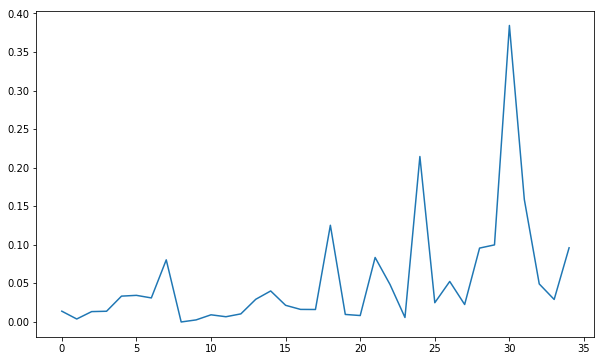

In [31]:
plt.figure(figsize=(10,6))
plt.plot(hasil4)

# Pajak Tak Langung

In [32]:
iai = data.loc[data["Sektor"] == "Pajak Tak Langsung "]
iai = iai.reset_index()
del iai["Sektor"] , iai["Kode"], iai["index"]
iai = iai.iloc[:, :35]
n = iai / jumlah
n

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.006167,0.007741,0.004155,0.007688,0.006961,0.007962,0.006646,0.029197,NaN,0.000679,...,0.014018,0.059622,0.029329,0.009066,0.020555,0.006585,0.007827,0.024884,0.0,0.019095


In [33]:
n = np.array(n)
d = np.diag(n[0])
d

array([[0.00616706, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00774059, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00415489, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02488433, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01909497]])

### PtL x Pengganda

In [34]:
pajak = np.multiply(d, BL, out=np.zeros_like(aa), where=bb!=0)
hasil5 = np.sum(pajak, axis=0)
hasil5

array([0.00667933, 0.00843665, 0.00447035, 0.00803563, 0.00696772,
       0.00825962, 0.00674095, 0.02924199, 0.        , 0.0006934 ,
       0.00148345, 0.00319572, 0.00684071, 0.02313521, 0.00928869,
       0.01124611, 0.01012671, 0.01572209, 0.08699205, 0.01310507,
       0.01405235, 0.07427066, 0.06135555, 0.00631538, 0.00044241,
       0.01409239, 0.05988137, 0.02944232, 0.00948393, 0.0206606 ,
       0.00717727, 0.00861943, 0.02796451, 0.        , 0.01934246])

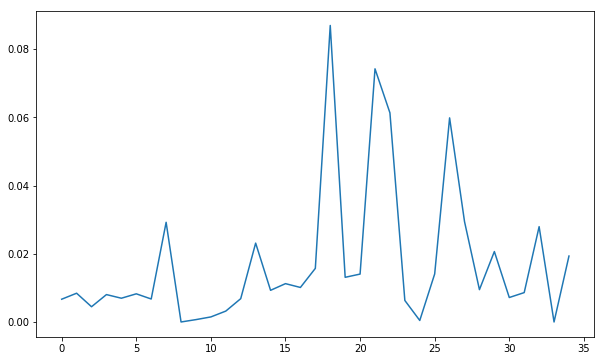

In [35]:
plt.figure(figsize=(10,6))
plt.plot(hasil5)

# Summarize

In [36]:
ok = {'Impor': hasil1, 'Upah': hasil2, "Surplus Usaha": hasil3, "Penyusutan" : hasil3, "Pajak tL" : hasil4, "Nilai Tambah Bruto": hasil7}
summ = pd.DataFrame(data=ok)
summ.to_csv("Multiplier.csv")
summ

,Impor,Upah,Surplus Usaha,Penyusutan,Pajak tL,Nilai Tambah Bruto
0,0.130133,0.140920,0.672080,0.672080,0.013983,0.833663
1,0.006603,0.125566,0.775585,0.775585,0.003870,0.913458
2,0.190797,0.174328,0.546506,0.546506,0.013446,0.738751
3,0.052968,0.143815,0.578133,0.578133,0.013910,0.743894
4,0.073885,0.172481,0.588787,0.588787,0.033507,0.801742
5,0.010111,0.180148,0.703223,0.703223,0.034521,0.926151
6,0.072295,0.034179,0.575214,0.575214,0.031182,0.647315
7,0.228453,0.192680,0.367247,0.367247,0.080550,0.669718
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.030118,0.020798,0.048226,0.048226,0.002685,0.072403
